In [38]:
import glob
import os
import gensim
from gensim import corpora
from gensim.models import LdaModel
import pandas as pd

from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [39]:
FOLDER_MINUTES_LEMMATIZED = "./data/processed/copom_minutes_lemmatized"

In [40]:
all_docs_with_metadata = []
all_docs_for_lda = []

filepaths = glob.glob(f"{FOLDER_MINUTES_LEMMATIZED}/*.txt")
for path in filepaths:
    filename = os.path.basename(path)
    with open(path, 'r', encoding='utf-8') as f:
        paragraphs = [line.split() for line in f.readlines() if len(line.split()) > 5]
        for p in paragraphs:
            all_docs_with_metadata.append({'text': p, 'filename': filename})
            all_docs_for_lda.append(p)

In [41]:
dictionary = corpora.Dictionary(all_docs_for_lda)

corpus = [dictionary.doc2bow(doc) for doc in all_docs_for_lda]

# How many topics to use?

In [42]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Calculate the coherence score for multiple number of topics.
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=100, passes=15)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        print(f"N of Topics: {num_topics}\t-\tCoherence Value: {coherencemodel.get_coherence():.4f}")

    return model_list, coherence_values

In [43]:
limit=26
start=2
step=2

model_list, coherence_values = compute_coherence_values(
    dictionary=dictionary, corpus=corpus, texts=all_docs_for_lda, start=start, limit=limit, step=step
)

N of Topics: 2	-	Coherence Value: 0.5430
N of Topics: 4	-	Coherence Value: 0.5196
N of Topics: 6	-	Coherence Value: 0.5750
N of Topics: 8	-	Coherence Value: 0.5953
N of Topics: 10	-	Coherence Value: 0.5613
N of Topics: 12	-	Coherence Value: 0.5707
N of Topics: 14	-	Coherence Value: 0.6006
N of Topics: 16	-	Coherence Value: 0.5897
N of Topics: 18	-	Coherence Value: 0.5901
N of Topics: 20	-	Coherence Value: 0.5654
N of Topics: 22	-	Coherence Value: 0.5522
N of Topics: 24	-	Coherence Value: 0.5790


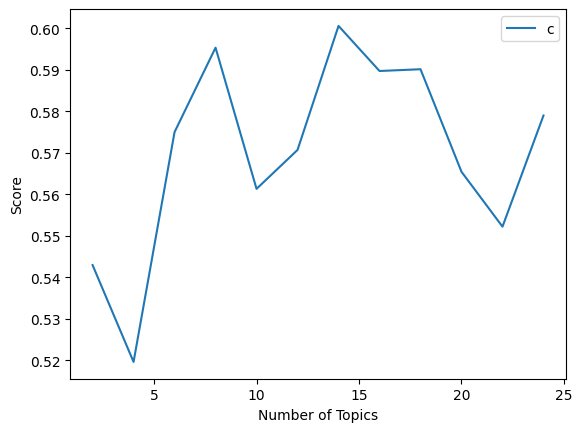

In [44]:
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [45]:
for i in model_list:
    print(i)

model_list[3]

LdaModel<num_terms=5137, num_topics=2, decay=0.5, chunksize=2000>
LdaModel<num_terms=5137, num_topics=4, decay=0.5, chunksize=2000>
LdaModel<num_terms=5137, num_topics=6, decay=0.5, chunksize=2000>
LdaModel<num_terms=5137, num_topics=8, decay=0.5, chunksize=2000>
LdaModel<num_terms=5137, num_topics=10, decay=0.5, chunksize=2000>
LdaModel<num_terms=5137, num_topics=12, decay=0.5, chunksize=2000>
LdaModel<num_terms=5137, num_topics=14, decay=0.5, chunksize=2000>
LdaModel<num_terms=5137, num_topics=16, decay=0.5, chunksize=2000>
LdaModel<num_terms=5137, num_topics=18, decay=0.5, chunksize=2000>
LdaModel<num_terms=5137, num_topics=20, decay=0.5, chunksize=2000>
LdaModel<num_terms=5137, num_topics=22, decay=0.5, chunksize=2000>
LdaModel<num_terms=5137, num_topics=24, decay=0.5, chunksize=2000>


In [46]:
topics_n_8 = model_list[3].print_topics(num_words=10)
for topic in topics_n_8:
    print(topic)

(0, '0.018*"economy" + 0.016*"economic" + 0.015*"growth" + 0.013*"market" + 0.012*"activity" + 0.011*"demand" + 0.010*"high" + 0.009*"remain" + 0.009*"recovery" + 0.008*"domestic"')
(1, '0.066*"inflation" + 0.054*"rate" + 0.034*"target" + 0.031*"scenario" + 0.027*"meeting" + 0.026*"copom" + 0.026*"exchange" + 0.021*"expectation" + 0.020*"projection" + 0.017*"forecast"')
(2, '0.062*"good" + 0.044*"production" + 0.031*"core" + 0.030*"increase" + 0.026*"capital" + 0.020*"industrial" + 0.019*"month" + 0.017*"consumer" + 0.013*"industry" + 0.012*"decrease"')
(3, '0.049*"inflation" + 0.043*"monetary" + 0.039*"policy" + 0.030*"committee" + 0.022*"copom" + 0.016*"risk" + 0.016*"target" + 0.014*"scenario" + 0.013*"rate" + 0.012*"member"')
(4, '0.062*"billion" + 0.043*"u" + 0.024*"operation" + 0.022*"credit" + 0.021*"increase" + 0.020*"month" + 0.020*"total" + 0.019*"reach" + 0.018*"rate" + 0.018*"average"')
(5, '0.078*"price" + 0.046*"increase" + 0.036*"inflation" + 0.032*"month" + 0.028*"index

Topic 0: Economic Activity & Growth
 - economy, economic, growth, market, activity, demand, high, remain, recovery, domestic

Topic 1:  Inflation Expectations & Scenarios
 - inflation, rate, target, scenario, meeting, copom, exchange, expectation, projection, forecast

Topic 2: Industrial Production & Goods
 - good, production, core, increase, capital, industrial, month, consumer, industry, decrease

Topic 3: Monetary Policy & Risk Assessment
 - inflation, monetary, policy, committee, copom, risk, target, scenario, rate, member

Topic 4: Financial Operations & Credit
 - billion, u, operation, credit, increase, month, total, reach, rate, average

Topic 5: Inflation
 - price, increase, inflation, month, index, ipca, food, consumer, change, twelve

Topic 6: Economic Data & Comparisons (less clear)
 - increase, sale, month, accord, compare, year, data, adjust, quarter, seasonally

Topic 7: Interest Rate Projections (less clear)
 - price, rate, projection, interest, meeting, consider, readjustment, base, copom, increase

In [47]:
topics_n_14 = model_list[6].print_topics(num_words=10)
for topic in topics_n_14:
    print(topic)

(0, '0.061*"price" + 0.024*"oil" + 0.020*"international" + 0.020*"market" + 0.019*"increase" + 0.015*"global" + 0.014*"commodity" + 0.012*"country" + 0.012*"volatility" + 0.011*"since"')
(1, '0.064*"billion" + 0.038*"security" + 0.026*"total" + 0.025*"auction" + 0.021*"treasury" + 0.020*"mature" + 0.018*"net" + 0.017*"public" + 0.016*"surplus" + 0.016*"primary"')
(2, '0.101*"good" + 0.046*"core" + 0.040*"inflation" + 0.035*"capital" + 0.032*"month" + 0.029*"increase" + 0.023*"production" + 0.022*"consumer" + 0.020*"calculate" + 0.015*"intermediate"')
(3, '0.059*"monetary" + 0.049*"policy" + 0.047*"committee" + 0.047*"member" + 0.046*"economy" + 0.027*"target" + 0.023*"rate" + 0.021*"inflation" + 0.019*"decide" + 0.016*"brazilian"')
(4, '0.096*"u" + 0.074*"billion" + 0.040*"month" + 0.040*"export" + 0.033*"trade" + 0.028*"import" + 0.026*"increase" + 0.024*"reach" + 0.023*"surplus" + 0.022*"year"')
(5, '0.088*"price" + 0.054*"increase" + 0.040*"month" + 0.038*"index" + 0.025*"inflation"

Topic 0: Global Economy / Commodities
 - price, oil, international, market, increase, global, commodity, country, volatility, since

Topic 1: Public Debt / Treasury Operations
 - billion, security, total, auction, treasury, mature, net, public, surplus, primary

Topic 2: Core Inflation / Goods (less clear)
 - good, core, inflation, capital, month, increase, production, consumer, calculate, intermediate

Topic 3: Monetary Committee
 - monetary, policy, committee, member, economy, target, rate, inflation, decide, brazilian

Topic 4: Foreign Trade / Balance of Payments
 - u, billion, month, export, trade, import, increase, reach, surplus, year

Topic 5: Inflation
 - price, increase, month, index, inflation, consumer, ipca, compare, twelve change

Topic 6: Industrial Production & Retail Sales
 - increase, sale, adjust, seasonally, industrial, accord, production, month, data, compare

Topic 7: Banking System / Liquidity / Treasury Operations
- operation, day, average, billion, daily, liquidity, bank, tenure, bcb, market

Topic 8: Market expectation / Interest Rates / Exchange Rates (less clear)
 - rate, inflation, scenario, copom, exchange, target, interest, meeting, expectation, increase

Topic 9: Labor Market
 - increase, employment, rate, month, accord, compare, labor, job, unemployment, real

 Topic 10: Monetary Policy (less clear)
 - inflation, policy, monetary, copom, risk, committee, scenario, economic, expectation, target

Topic 11: Prices / Rates / Credit (lees clear)
 - price, rate, credit, projection, increase, readjustment, base, consider, individual, tariff

Topic 12: Domestic Demand & Economic Activity
 - economy, market, activity, factor, domestic, demand, pressure, credit, economic, inflationary

Topic 13: Economic Growth & Recovery
- growth, economic, quarter, level, activity, recovery, indicator, rate, high, economy